In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score

In [84]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
X = df[cancer_data['feature_names']].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101) 

In [86]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Accuracy: ", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.972027972027972
precision:  0.9772727272727273
recall:  0.9772727272727273
f1 score:  0.9772727272727273


#### using parameter tuning 

In [87]:
param_grid = {
    'max_features': [5, 7, 10, 11, 13, 15, 19],
    'n_estimators': [10, 25, 35, 50, 75, 100]
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv = 5)
gs.fit(X_train, y_train)
print("Best params: ", gs.best_params_)

Best params:  {'max_features': 11, 'n_estimators': 35}


In [88]:
rf1 = RandomForestClassifier(max_features = gs.best_params_['max_features'],
                             n_estimators = gs.best_params_['n_estimators'])
rf1.fit(X_train, y_train)
print("Accuracy: ", rf1.score(X_test, y_test))
y_pred = rf1.predict(X_test)
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("f1 score: ", f1_score(y_test, y_pred))

Accuracy:  0.972027972027972
precision:  0.9772727272727273
recall:  0.9772727272727273
f1 score:  0.9772727272727273


### Elbow Graph 

In [98]:
param_grid = {
    'n_estimators': list(range(1, 101))
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)
scores = gs.cv_results_['mean_test_score']

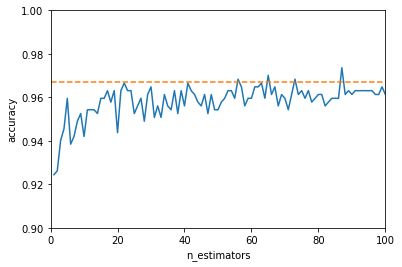

In [99]:
plt.plot(param_grid['n_estimators'], scores)
plt.plot((0, 100), (0.967, 0.967), linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.show()

In [100]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X, y)

RandomForestClassifier(n_estimators=10)

### feature importance 

In [93]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 111)
rf.fit(X_train, y_train)
ft_imp = pd.Series(rf.feature_importances_, index = cancer_data['feature_names']).sort_values(ascending=False)
ft_imp.head(10)

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

In [94]:
worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [95]:
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state = 111)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.951048951048951